In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

C:\Users\91798\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\91798\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:

# importing monthly shoe sales dataset

shoe_sales = pd.read_csv("shoe_sales.csv")
shoe_sales_df = pd.DataFrame(shoe_sales, columns=['YearMonth', 'Shoe_Sales'])
print(shoe_sales_df)





    YearMonth  Shoe_Sales
0     1980-01          85
1     1980-02          89
2     1980-03         109
3     1980-04          95
4     1980-05          91
..        ...         ...
182   1995-03         188
183   1995-04         195
184   1995-05         189
185   1995-06         220
186   1995-07         274

[187 rows x 2 columns]


In [ ]:
# Creating time series Index

shoe_sales.index = pd.to_datetime(shoe_sales['YearMonth'])

print(shoe_sales.index)

    YearMonth  SoftDrinkProduction
0     1980-01                 1954
1     1980-02                 2302
2     1980-03                 3054
3     1980-04                 2414
4     1980-05                 2226
..        ...                  ...
182   1995-03                 4067
183   1995-04                 4022
184   1995-05                 3937
185   1995-06                 4365
186   1995-07                 4290

[187 rows x 2 columns]


           YearMonth  Shoe_Sales
YearMonth                       
1980-01-01   1980-01          85
1980-02-01   1980-02          89
1980-03-01   1980-03         109
1980-04-01   1980-04          95
1980-05-01   1980-05          91
...              ...         ...
1995-03-01   1995-03         188
1995-04-01   1995-04         195
1995-05-01   1995-05         189
1995-06-01   1995-06         220
1995-07-01   1995-07         274

[187 rows x 2 columns]


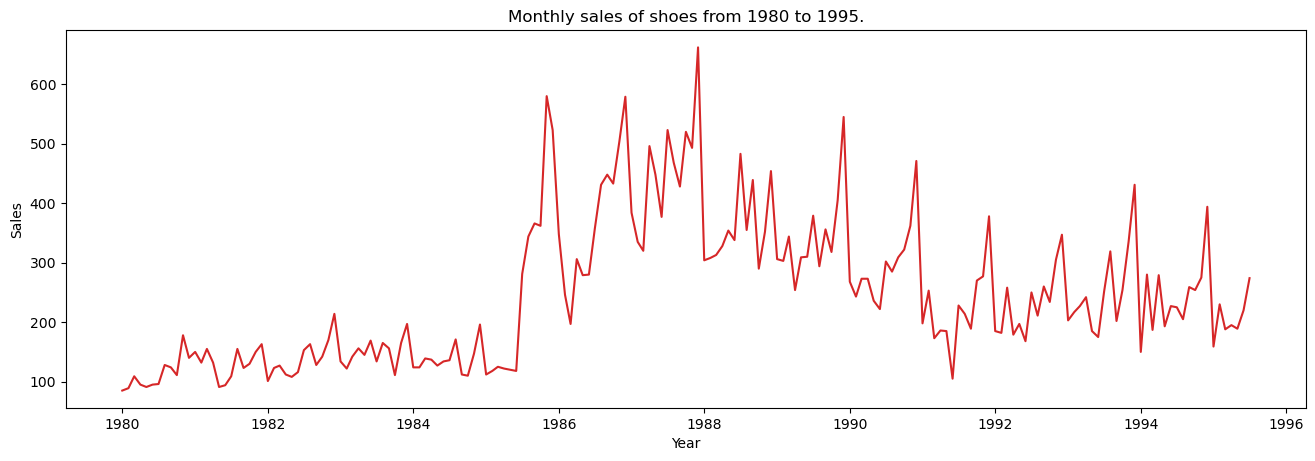

In [19]:
## Time series Plot
def plot_df(df, x, y, title="", xlabel='Year', ylabel='Sales', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(shoe_sales, x=shoe_sales.index, y=shoe_sales.Shoe_Sales, title='Monthly sales of shoes from 1980 to 1995.')    



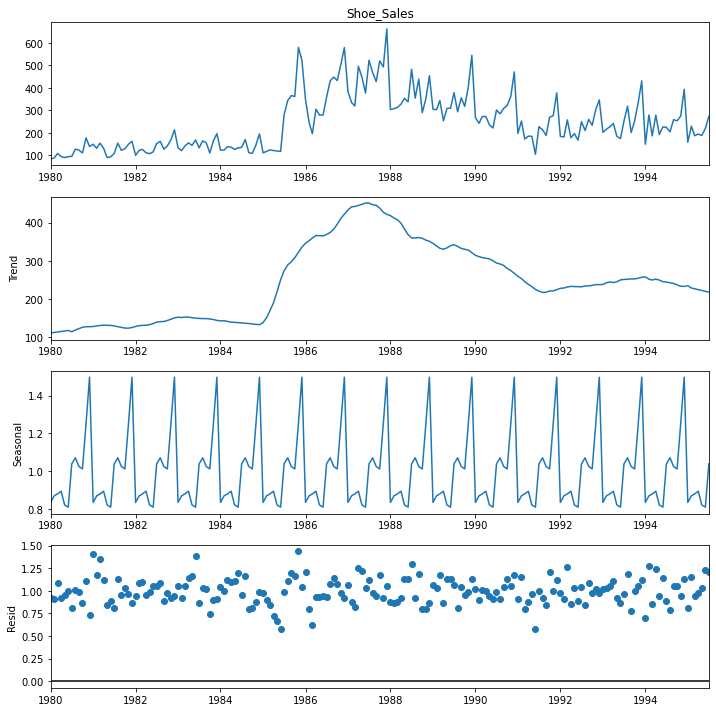

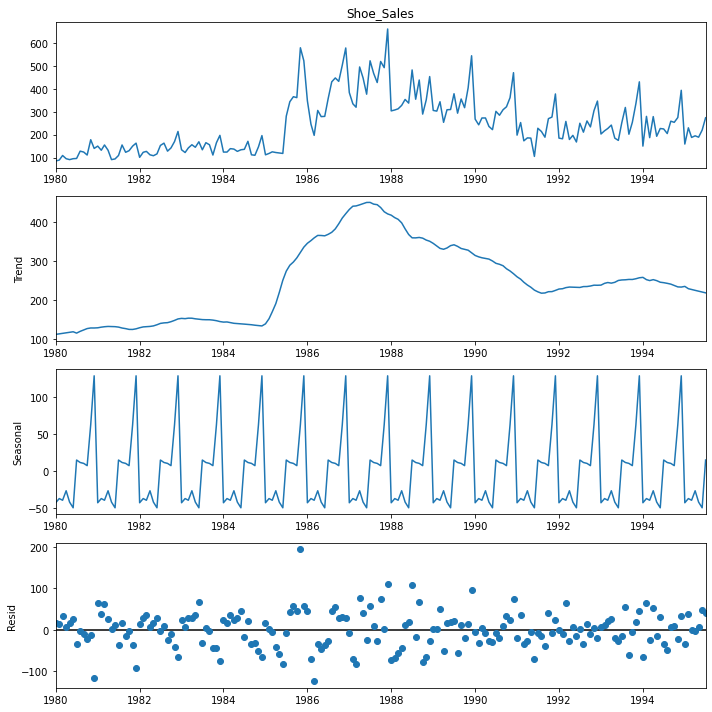

In [34]:
# importing required package for time series decomposition

from statsmodels.tsa.seasonal import seasonal_decompose


# Multiplicative time series Decomposition 
mul_dec = seasonal_decompose(shoe_sales['Shoe_Sales'],model='multiplicative', extrapolate_trend='freq')

# Additive Decomposition
add_dec = seasonal_decompose(shoe_sales['Shoe_Sales'], model='additive', extrapolate_trend='freq')

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
mul_dec.plot()
add_dec.plot()
plt.show()



In [35]:
df_tm = pd.concat([mul_dec.seasonal, mul_dec.trend, mul_dec.resid, mul_dec.observed], axis=1)
df_tm.columns = ['seasonlity', 'trend', 'residual', 'actual_values']
df_tm.head()

,seasonlity,trend,residual,actual_values
YearMonth,,,,
1980-01-01,0.834248,111.147970,0.916689,85.0
1980-02-01,0.869347,112.498932,0.910014,89.0
1980-03-01,0.879227,113.849893,1.088912,109.0
1980-04-01,0.893579,115.200855,0.922858,95.0
1980-05-01,0.820948,116.551816,0.951058,91.0


In [259]:
# importing required library for ADF fuller test
from statsmodels.tsa.stattools import adfuller, kpss

# ADF Test
test_out = adfuller(shoe_sales.Shoe_Sales, autolag='AIC')

print(f'ADF Statistic: {test_out[0]}')
print(f'p-value: {test_out[1]}')
for key, value in test_out[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')



ADF Statistic: -1.7173974216499899
p-value: 0.42217182696953576
Critial Values:
   1%, -3.4687256239864017
Critial Values:
   5%, -2.8783961376954363
Critial Values:
   10%, -2.57575634100705


In [258]:
shoe_sales.Shoe_Sales1=shoe_sales.Shoe_Sales.diff()

test_output = adfuller(shoe_sales.Shoe_Sales1.dropna(), autolag='AIC')

print(f'ADF Statistic: {test_output[0]}')
print(f'p-value: {test_output[1]}')
for key, value in test_output[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')
 

ADF Statistic: -3.4791603478681146
p-value: 0.008538710846569274
Critial Values:
   1%, -3.4687256239864017
Critial Values:
   5%, -2.8783961376954363
Critial Values:
   10%, -2.57575634100705

KPSS Statistic: 0.094320
p-value: 0.100000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


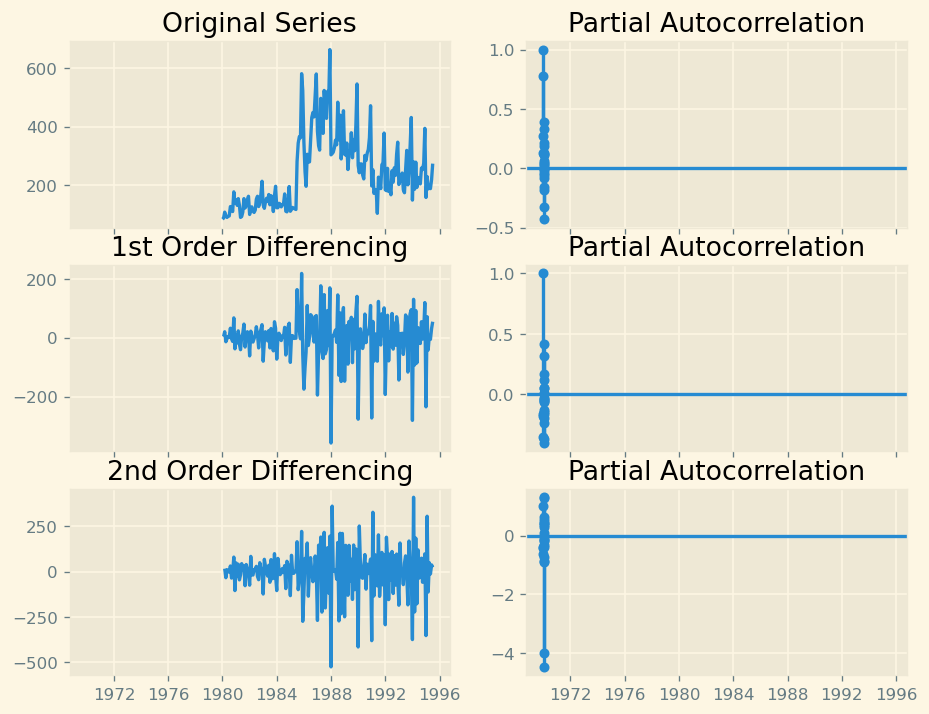

In [253]:

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(shoe_sales.Shoe_Sales); axes[0, 0].set_title('Original Series')
plot_pacf(shoe_sales.Shoe_Sales, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(shoe_sales.Shoe_Sales.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_pacf(shoe_sales.Shoe_Sales.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(shoe_sales.Shoe_Sales.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_pacf(shoe_sales.Shoe_Sales.diff().diff().dropna(), ax=axes[2, 1])

plt.show()


In [197]:
shoe_sales['Shoe_Sales1']=shoe_sales.Shoe_Sales1.dropna()
print(shoe_sales)

           YearMonth  Shoe_Sales  Shoe_Sales1
YearMonth                                    
1980-01-01   1980-01          85          NaN
1980-02-01   1980-02          89          4.0
1980-03-01   1980-03         109         20.0
1980-04-01   1980-04          95        -14.0
1980-05-01   1980-05          91         -4.0
...              ...         ...          ...
1995-03-01   1995-03         188        -42.0
1995-04-01   1995-04         195          7.0
1995-05-01   1995-05         189         -6.0
1995-06-01   1995-06         220         31.0
1995-07-01   1995-07         274         54.0

[187 rows x 3 columns]


In [214]:


x=pd.to_datetime(shoe_sales['YearMonth'], format='%Y-%m-%d')
y=shoe_sales['Shoe_Sales1'].values.reshape(-1, 1)

print(shoe_sales)
from sklearn.model_selection import train_test_split  
X_train=x.values.reshape(-1, 1)[0:120]
X_test=x.values.reshape(-1, 1)[120:186]
y_train=y[0:120]
y_test=y[120:186]
print(y_train)

           YearMonth  Shoe_Sales  Shoe_Sales1
YearMonth                                    
1980-01-01   1980-01          85          NaN
1980-02-01   1980-02          89          4.0
1980-03-01   1980-03         109         20.0
1980-04-01   1980-04          95        -14.0
1980-05-01   1980-05          91         -4.0
...              ...         ...          ...
1995-03-01   1995-03         188        -42.0
1995-04-01   1995-04         195          7.0
1995-05-01   1995-05         189         -6.0
1995-06-01   1995-06         220         31.0
1995-07-01   1995-07         274         54.0

[187 rows x 3 columns]
[[  nan]
 [   4.]
 [  20.]
 [ -14.]
 [  -4.]
 [   4.]
 [   1.]
 [  32.]
 [  -4.]
 [ -13.]
 [  67.]
 [ -38.]
 [  10.]
 [ -18.]
 [  23.]
 [ -23.]
 [ -41.]
 [   3.]
 [  15.]
 [  46.]
 [ -32.]
 [   7.]
 [  20.]
 [  13.]
 [ -62.]
 [  22.]
 [   4.]
 [ -15.]
 [  -4.]
 [   8.]
 [  37.]
 [  10.]
 [ -35.]
 [  14.]
 [  28.]
 [  44.]
 [ -80.]
 [ -12.]
 [  20.]
 [  14.]
 [ -11.]
 [  24.]


In [220]:
model=ExponentialSmoothing(endog=shoe_sales.Shoe_Sales1).fit()
predictions=model.forecast(steps=66)

#print(predictions)
#RMSE

(np.mean(y_test-predictions.values)**2)**0.5

6.928170642436188

In [228]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt
from statsmodels.tsa.api import SimpleExpSmoothing

ses = SimpleExpSmoothing(np.asarray(shoe_sales.Shoe_Sales1))

alpha = 0.2
model = ses.fit(smoothing_level = alpha, optimized = False)
pred1 = model.forecast(66)
model1 = ses.fit(smoothing_level=.3)
pred2 = model1.forecast(66)
model2 = ses.fit(smoothing_level=.5)
pred3 = model2.forecast(66)
#print(pred1)



[10.7613544 10.7613544 10.7613544 10.7613544 10.7613544 10.7613544
 10.7613544 10.7613544 10.7613544 10.7613544 10.7613544 10.7613544
 10.7613544 10.7613544 10.7613544 10.7613544 10.7613544 10.7613544
 10.7613544 10.7613544 10.7613544 10.7613544 10.7613544 10.7613544
 10.7613544 10.7613544 10.7613544 10.7613544 10.7613544 10.7613544
 10.7613544 10.7613544 10.7613544 10.7613544 10.7613544 10.7613544
 10.7613544 10.7613544 10.7613544 10.7613544 10.7613544 10.7613544
 10.7613544 10.7613544 10.7613544 10.7613544 10.7613544 10.7613544
 10.7613544 10.7613544 10.7613544 10.7613544 10.7613544 10.7613544
 10.7613544 10.7613544 10.7613544 10.7613544 10.7613544 10.7613544
 10.7613544 10.7613544 10.7613544 10.7613544 10.7613544 10.7613544]


In [229]:
#RMSE

(np.mean(y_test-pred1)**2)**0.5




15.685596824415756

In [230]:
(np.mean(y_test-pred2)**2)**0.5

23.276962380219906

In [231]:
(np.mean(y_test-pred3)**2)**0.5

37.8451355282234

In [232]:

model = Holt(np.asarray(shoe_sales.Shoe_Sales1))


fit1 = model.fit(smoothing_level=.3, smoothing_slope=.05)
pred1 = fit1.forecast(66)
fit2 = model.fit(optimized=True)
pred2 = fit2.forecast(66)
fit3 = model.fit(smoothing_level=.3, smoothing_slope=.2)
pred3 = fit3.forecast(66)
print(pred1)



[18.81579941 19.79629587 20.77679233 21.75728879 22.73778525 23.71828171
 24.69877817 25.67927463 26.65977109 27.64026755 28.62076401 29.60126047
 30.58175693 31.56225339 32.54274985 33.52324631 34.50374277 35.48423923
 36.46473569 37.44523215 38.42572861 39.40622507 40.38672153 41.36721799
 42.34771445 43.32821091 44.30870737 45.28920383 46.26970029 47.25019675
 48.23069321 49.21118967 50.19168613 51.17218259 52.15267905 53.13317551
 54.11367196 55.09416842 56.07466488 57.05516134 58.0356578  59.01615426
 59.99665072 60.97714718 61.95764364 62.9381401  63.91863656 64.89913302
 65.87962948 66.86012594 67.8406224  68.82111886 69.80161532 70.78211178
 71.76260824 72.7431047  73.72360116 74.70409762 75.68459408 76.66509054
 77.645587   78.62608346 79.60657992 80.58707638 81.56757284 82.5480693 ]


In [233]:

#Root mean Square Error

(np.mean(y_test-pred1)**2)**0.5


55.606176779791134

In [234]:
(np.mean(y_test-pred2)**2)**0.5


30.311707215646532

In [235]:
(np.mean(y_test-pred3)**2)**0.5

172.89587871867036

In [267]:



from statsmodels.tsa.arima_model import ARIMA
shoe_sales.Shoe_Sales1=shoe_sales.Shoe_Sales1.dropna()
model = ARIMA(np.asarray(shoe_sales.Shoe_Sales1), order=(12,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())

pred1 = model_fit.forecast()

print(pred1)



                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  185
Model:                ARIMA(12, 1, 0)   Log Likelihood               -1007.989
Method:                       css-mle   S.D. of innovations             54.806
Date:                Wed, 19 Apr 2023   AIC                           2043.978
Time:                        17:59:10   BIC                           2089.063
Sample:                             1   HQIC                          2062.250
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0165      0.260     -0.064      0.949      -0.525       0.492
ar.L1.D.y     -1.4492      0.068    -21.235      0.000      -1.583      -1.315
ar.L2.D.y     -1.4646      0.099    -14.839      0.0

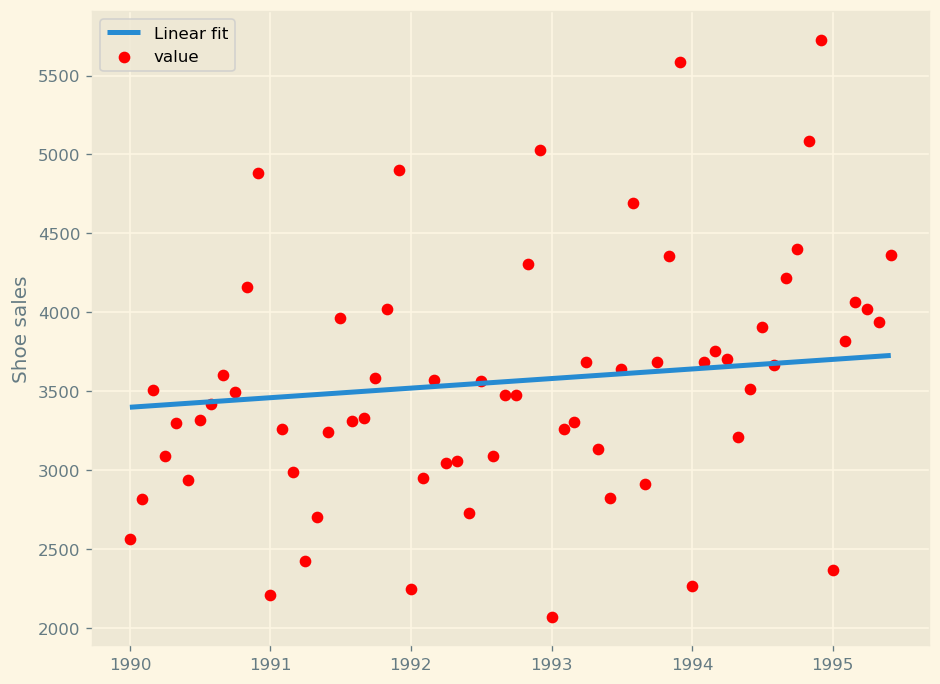

In [260]:
from sklearn import linear_model
x=pd.to_datetime(shoe_sales['YearMonth'], format='%Y-%m-%d')
y=shoe_sales['Shoe_Sales'].values.reshape(-1, 1)

lm = linear_model.LinearRegression()
model = lm.fit(X_train.reshape(-1, 1),y_train)

predictions = lm.predict(X_test.astype(float).reshape(-1, 1))

f, ax = plt.subplots(1, 1)
ax.plot(X_test, predictions,label='Linear fit', lw=3)
ax.scatter(X_test, y_test,label='value', marker='o', color='r')
plt.ylabel('Shoe sales')
ax.legend();



In [261]:
(np.mean(y_test-predictions)**2)**0.5

10.254780553180767

In [ ]:
#importing softdrink dataset
softdrink = pd.read_csv("softdrink.csv")

softdrink_df = pd.DataFrame(softdrink, columns=['YearMonth', 'SoftDrinkProduction'])
print(softdrink_df)


In [14]:
# Creating time series Object
softdrink_df.index = pd.to_datetime(softdrink_df['YearMonth'])

print(softdrink_df.index)

DatetimeIndex(['1980-01-01', '1980-02-01', '1980-03-01', '1980-04-01',
               '1980-05-01', '1980-06-01', '1980-07-01', '1980-08-01',
               '1980-09-01', '1980-10-01',
               ...
               '1994-10-01', '1994-11-01', '1994-12-01', '1995-01-01',
               '1995-02-01', '1995-03-01', '1995-04-01', '1995-05-01',
               '1995-06-01', '1995-07-01'],
              dtype='datetime64[ns]', name='YearMonth', length=187, freq=None)


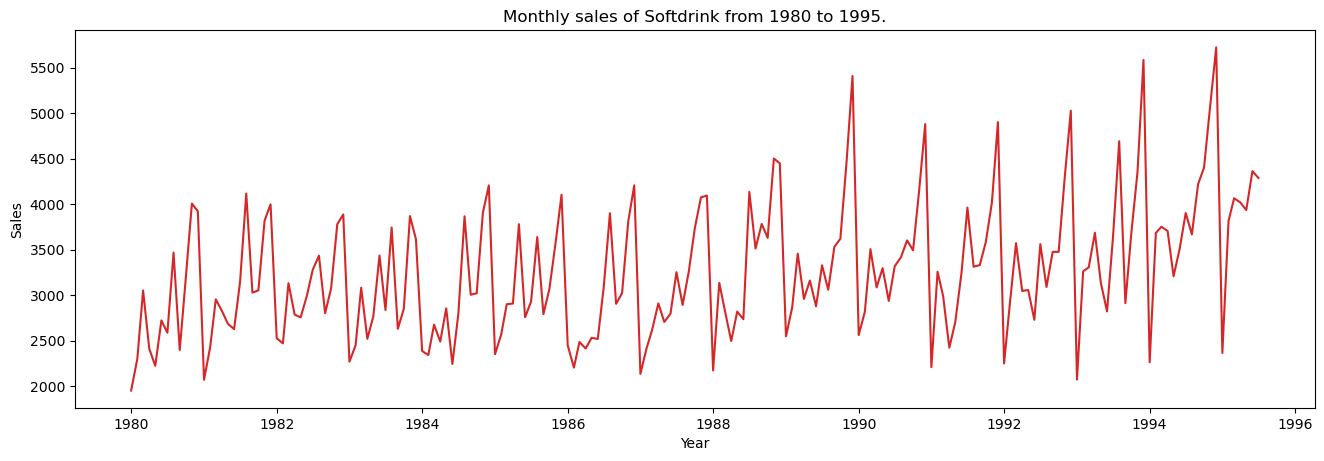

In [20]:
# Time series Plot
def plot_df(df, x, y, title="", xlabel='Year', ylabel='Sales', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(softdrink_df, x=softdrink_df.index, y=softdrink_df.SoftDrinkProduction, title='Monthly sales of Softdrink from 1980 to 1995.')    


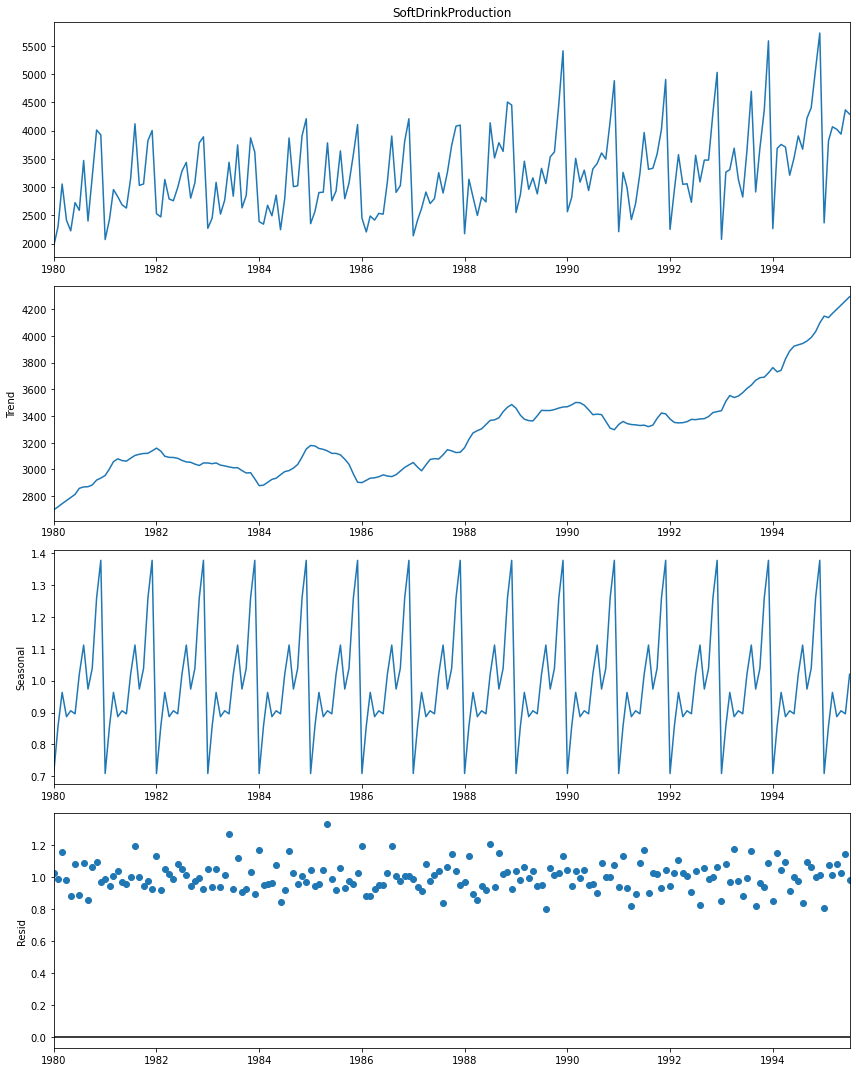

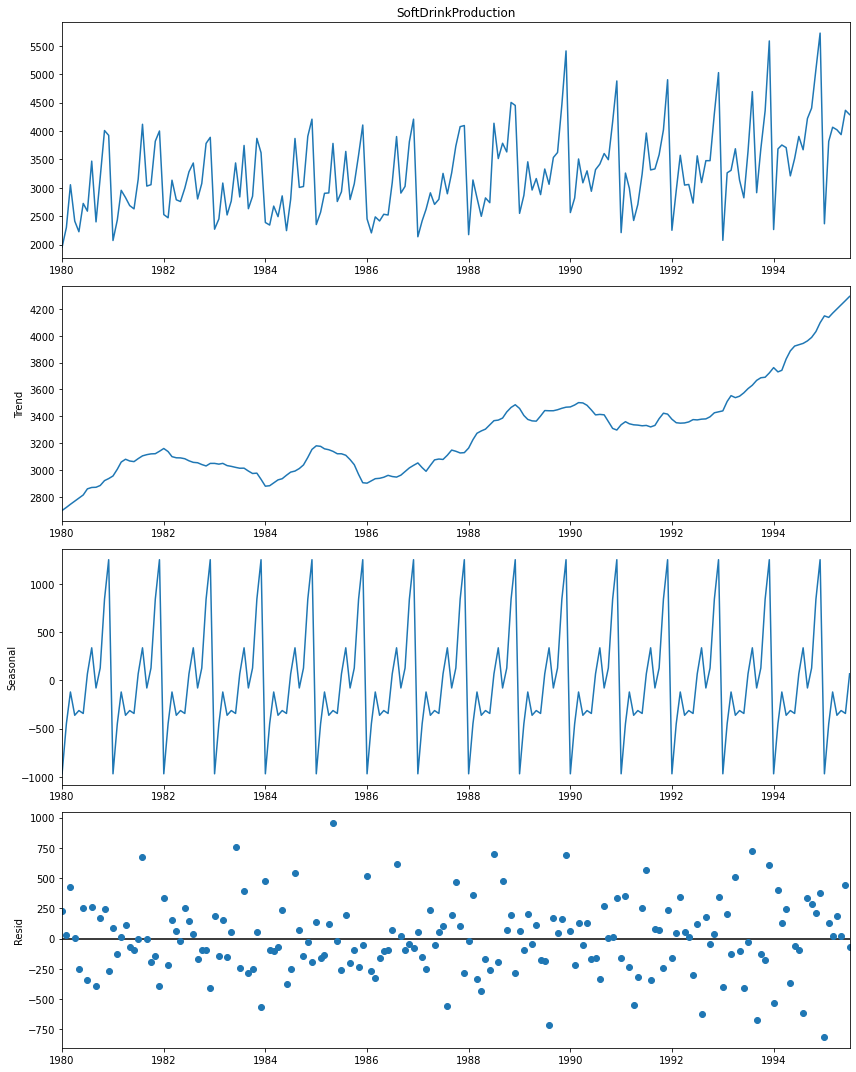

In [39]:
# Multiplicative Decomposition 
mul_dec = seasonal_decompose(softdrink_df['SoftDrinkProduction'],model='multiplicative', extrapolate_trend='freq')

# Additive Decomposition
add_dec = seasonal_decompose(softdrink_df['SoftDrinkProduction'], model='additive', extrapolate_trend='freq')

# Plot
plt.rcParams.update({'figure.figsize': (12,15)})
mul_dec.plot()
add_dec.plot()
plt.show()


In [40]:
df_tm = pd.concat([mul_dec.seasonal, mul_dec.trend, mul_dec.resid, mul_dec.observed], axis=1)
df_tm.columns = ['seasonality', 'trend', 'residual', 'actual_values']
df_tm.head()

,seasonality,trend,residual,actual_values
YearMonth,,,,
1980-01-01,0.708934,2697.536908,1.021765,1954.0
1980-02-01,0.858168,2720.687986,0.985949,2302.0
1980-03-01,0.963251,2743.839064,1.155503,3054.0
1980-04-01,0.887111,2766.990142,0.983448,2414.0
1980-05-01,0.905654,2790.141220,0.880921,2226.0


In [41]:
from statsmodels.tsa.stattools import adfuller, kpss

# ADF Test
test_output = adfuller(softdrink_df.SoftDrinkProduction, autolag='AIC')

print(f'ADF Statistic: {test_output[0]}')
print(f'p-value: {test_output[1]}')
for key, value in test_output[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

# KPSS Test
test_output = kpss(softdrink_df.SoftDrinkProduction, regression='c')
print('\nKPSS Statistic: %f' % test_output[0])
print('p-value: %f' % test_output[1])
for key, value in test_output[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: 1.0987337558692907
p-value: 0.9952058011881897
Critial Values:
   1%, -3.4685016947910636
Critial Values:
   5%, -2.8782983668563396
Critial Values:
   10%, -2.57570415906989

KPSS Statistic: 1.022988
p-value: 0.010000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


C:\Users\91798\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\91798\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


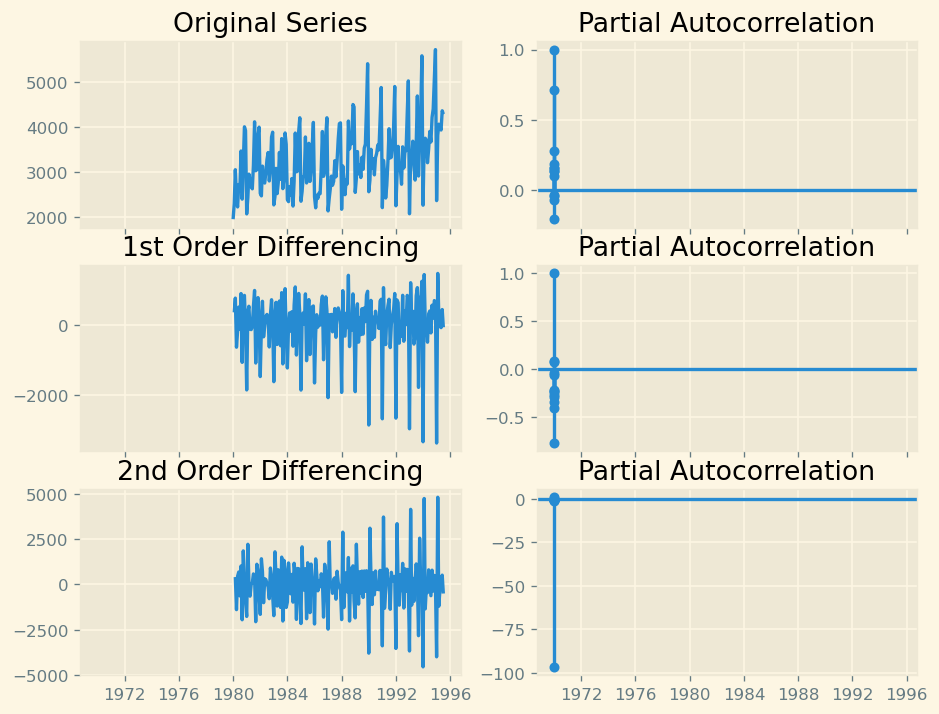

In [155]:

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(softdrink_df.SoftDrinkProduction); axes[0, 0].set_title('Original Series')
plot_pacf(softdrink_df.SoftDrinkProduction, ax=axes[0, 1],lags=12)

# 1st Differencing
axes[1, 0].plot(softdrink_df.SoftDrinkProduction.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_pacf(softdrink_df.SoftDrinkProduction.diff().dropna(), ax=axes[1, 1],lags=12)

# 2nd Differencing
axes[2, 0].plot(softdrink_df.SoftDrinkProduction.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_pacf(softdrink_df.SoftDrinkProduction.diff().diff().dropna(), ax=axes[2, 1],lags=12)

plt.show()

In [239]:
softdrink_df.SoftDrinkProduction1=softdrink_df.SoftDrinkProduction.diff()
print(softdrink_df.SoftDrinkProduction1)
test_output = adfuller(softdrink_df.SoftDrinkProduction1.dropna(), autolag='AIC')

print(f'ADF Statistic: {test_output[0]}')
print(f'p-value: {test_output[1]}')
for key, value in test_output[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

YearMonth
1980-01-01      NaN
1980-02-01    348.0
1980-03-01    752.0
1980-04-01   -640.0
1980-05-01   -188.0
              ...  
1995-03-01    248.0
1995-04-01    -45.0
1995-05-01    -85.0
1995-06-01    428.0
1995-07-01    -75.0
Name: SoftDrinkProduction, Length: 187, dtype: float64
ADF Statistic: -9.313526950720643
p-value: 1.0337014652308875e-15
Critial Values:
   1%, -3.4685016947910636
Critial Values:
   5%, -2.8782983668563396
Critial Values:
   10%, -2.57570415906989


In [241]:
x=pd.to_datetime(softdrink_df['YearMonth'], format='%Y-%m-%d')
y=softdrink_df['SoftDrinkProduction'].values.reshape(-1, 1)

print(softdrink_df)
from sklearn.model_selection import train_test_split  
X_train=x.values.reshape(-1, 1)[0:120]
X_test=x.values.reshape(-1, 1)[120:186]
y_train=y[0:120]
y_test=y[120:186]


           YearMonth  SoftDrinkProduction
YearMonth                                
1980-01-01   1980-01                 1954
1980-02-01   1980-02                 2302
1980-03-01   1980-03                 3054
1980-04-01   1980-04                 2414
1980-05-01   1980-05                 2226
...              ...                  ...
1995-03-01   1995-03                 4067
1995-04-01   1995-04                 4022
1995-05-01   1995-05                 3937
1995-06-01   1995-06                 4365
1995-07-01   1995-07                 4290

[187 rows x 2 columns]


In [242]:


model=ExponentialSmoothing(endog=y_train).fit()
predictions=model.forecast(steps=66)

#print(predictions)
#RMSE

(np.mean(y_test-predictions)**2)**0.5

466.05503524574345

In [243]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt
from statsmodels.tsa.api import SimpleExpSmoothing

ses = SimpleExpSmoothing(np.asarray(y_train))

alpha = 0.2
model = ses.fit(smoothing_level = alpha, optimized = False)
pred1 = model.forecast(66)
model1 = ses.fit(smoothing_level=.3)
pred2 = model1.forecast(66)
model2 = ses.fit(smoothing_level=.5)
pred3 = model2.forecast(66)




[3932.60369099 3932.60369099 3932.60369099 3932.60369099 3932.60369099
 3932.60369099 3932.60369099 3932.60369099 3932.60369099 3932.60369099
 3932.60369099 3932.60369099 3932.60369099 3932.60369099 3932.60369099
 3932.60369099 3932.60369099 3932.60369099 3932.60369099 3932.60369099
 3932.60369099 3932.60369099 3932.60369099 3932.60369099 3932.60369099
 3932.60369099 3932.60369099 3932.60369099 3932.60369099 3932.60369099
 3932.60369099 3932.60369099 3932.60369099 3932.60369099 3932.60369099
 3932.60369099 3932.60369099 3932.60369099 3932.60369099 3932.60369099
 3932.60369099 3932.60369099 3932.60369099 3932.60369099 3932.60369099
 3932.60369099 3932.60369099 3932.60369099 3932.60369099 3932.60369099
 3932.60369099 3932.60369099 3932.60369099 3932.60369099 3932.60369099
 3932.60369099 3932.60369099 3932.60369099 3932.60369099 3932.60369099
 3932.60369099 3932.60369099 3932.60369099 3932.60369099 3932.60369099
 3932.60369099]


In [244]:

#Root mean Square Error

(np.mean(y_test-pred1)**2)**0.5

379.14914553875275

In [245]:

#Root mean Square Error

(np.mean(y_test-pred2)**2)**0.5


659.5349939523317

In [246]:

#Root mean Square Error

(np.mean(y_test-pred3)**2)**0.5

1136.4828612238323

In [273]:

model = Holt(np.asarray(softdrink_df.SoftDrinkProduction))


fit1 = model.fit(smoothing_level=.3, smoothing_slope=.05)
pred1 = fit1.forecast(66)
fit2 = model.fit(optimized=True)
pred2 = fit2.forecast(66)
fit3 = model.fit(smoothing_level=.3, smoothing_slope=.2)
pred3 = fit3.forecast(66)
#print(pred1)








[4220.38808814 4241.01811457 4261.648141   4282.27816742 4302.90819385
 4323.53822027 4344.1682467  4364.79827313 4385.42829955 4406.05832598
 4426.6883524  4447.31837883 4467.94840526 4488.57843168 4509.20845811
 4529.83848454 4550.46851096 4571.09853739 4591.72856381 4612.35859024
 4632.98861667 4653.61864309 4674.24866952 4694.87869594 4715.50872237
 4736.1387488  4756.76877522 4777.39880165 4798.02882807 4818.6588545
 4839.28888093 4859.91890735 4880.54893378 4901.17896021 4921.80898663
 4942.43901306 4963.06903948 4983.69906591 5004.32909234 5024.95911876
 5045.58914519 5066.21917161 5086.84919804 5107.47922447 5128.10925089
 5148.73927732 5169.36930374 5189.99933017 5210.6293566  5231.25938302
 5251.88940945 5272.51943588 5293.1494623  5313.77948873 5334.40951515
 5355.03954158 5375.66956801 5396.29959443 5416.92962086 5437.55964728
 5458.18967371 5478.81970014 5499.44972656 5520.07975299 5540.70977941
 5561.33980584]


In [274]:
(np.mean(y_test-pred1)**2)**0.5

1337.4094015377252

In [275]:
(np.mean(y_test-pred2)**2)**0.5

1374.4889027888867

In [276]:
(np.mean(y_test-pred3)**2)**0.5

1123.8637247294084

In [249]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
y_var=softdrink_df.SoftDrinkProduction1[0:119]
sarima = SARIMAX(y_var,
                order=(2,1,1),
                seasonal_order=(1,1,0,12))
predictions = sarima.fit().predict(nsteps=66)
print(sarima.fit().summary())

#print(predictions)
(np.mean(y_var-predictions)**2)**0.5

                                      SARIMAX Results                                      
Dep. Variable:                 SoftDrinkProduction   No. Observations:                  119
Model:             SARIMAX(2, 1, 1)x(1, 1, [], 12)   Log Likelihood                -778.990
Date:                             Wed, 19 Apr 2023   AIC                           1567.980
Time:                                     16:09:15   BIC                           1581.298
Sample:                                 01-01-1980   HQIC                          1573.378
                                      - 11-01-1989                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6322      0.082     -7.751      0.000      -0.792      -0.472
ar.L2         -0.3747      

0.5214206777272111

Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.


Split the data into training and testing. The test data should start in 1991.


Build various exponential smoothing models on the training data and evaluate the model using RMSE on the test data.


Other models such as regression,naïve forecast models, simple average models, etc. should also be built on the training data and check the performance on the test data using RMSE.


Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment.


Note: Stationarity should be checked at alpha = 0.05.


Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.


Build a table with all the models built along with their corresponding parameters and the respective RMSE values on the test data.


Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.


Comment on the model thus built and report your findings and suggest the measures that the company should be taking for future sales.



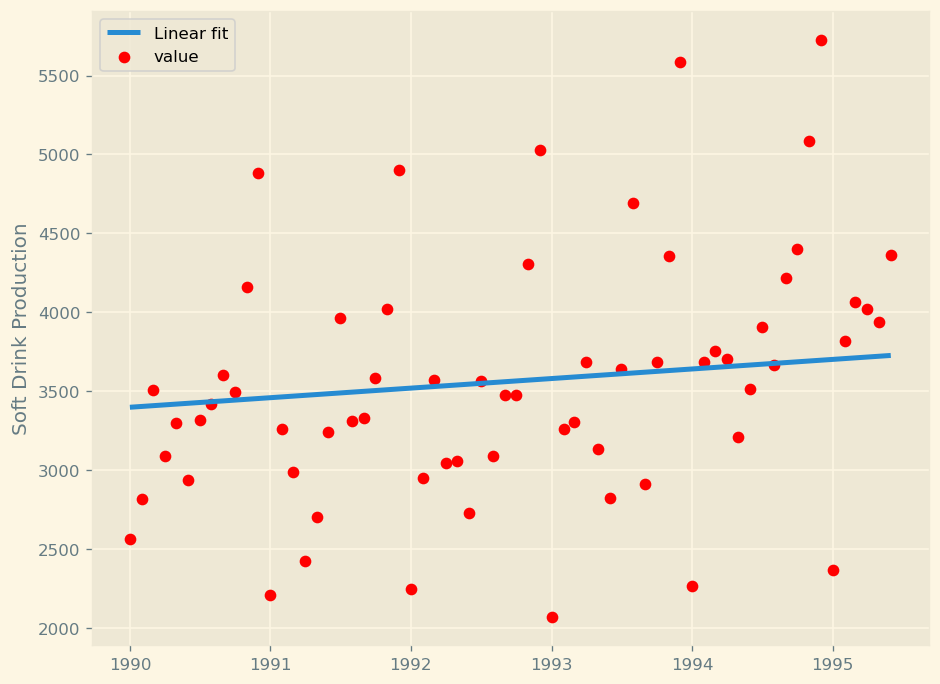

In [270]:

softdrink_df.SoftDrinkProduction
from sklearn import linear_model
x=pd.to_datetime(softdrink_df['YearMonth'], format='%Y-%m-%d')
y=softdrink_df['SoftDrinkProduction'].values.reshape(-1, 1)

lm = linear_model.LinearRegression()
model = lm.fit(X_train.reshape(-1, 1),y_train)

predictions = lm.predict(X_test.astype(float).reshape(-1, 1))

f, ax = plt.subplots(1, 1)
ax.plot(X_test, predictions,label='Linear fit', lw=3)
ax.scatter(X_test, y_test,label='value', marker='o', color='r')
plt.ylabel('Soft Drink Production')
ax.legend();



In [271]:
(np.mean(y_test-predictions)**2)**0.5

10.254780553180767